In [ ]:
!pip install langdetect
!pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as p
import matplotlib.pyplot as plt
import matplotlib as mpl
from langdetect import detect
import re
mpl.rcParams['agg.path.chunksize'] = 10000

data = p.read_csv("/content/drive/MyDrive/data.tsv", sep="\t")

print(data.head(20))

<ipython-input-3-ac59f3de5a90>:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = p.read_csv("/content/drive/MyDrive/data.tsv", sep="\t")


       tconst titleType                                 primaryTitle  \
0   tt0000001     short                                   Carmencita   
1   tt0000002     short                       Le clown et ses chiens   
2   tt0000003     short                               Pauvre Pierrot   
3   tt0000004     short                                  Un bon bock   
4   tt0000005     short                             Blacksmith Scene   
5   tt0000006     short                            Chinese Opium Den   
6   tt0000007     short  Corbett and Courtney Before the Kinetograph   
7   tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8   tt0000009     movie                                   Miss Jerry   
9   tt0000010     short                          Leaving the Factory   
10  tt0000011     short                      Akrobatisches Potpourri   
11  tt0000012     short                       The Arrival of a Train   
12  tt0000013     short  The Photographical Congress Arrives in 

In [ ]:
def detect_lang(input_string):
    try:
        return detect(input_string)
    except:
        return "Lang Error"

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=3)

INFO: Pandarallel will run on 3 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
data['runtimeMinutes'] = p.to_numeric(data['runtimeMinutes'], errors="coerce")
data['runtimeMinutes'] = data['runtimeMinutes'].dropna()
data['startYear'] = p.to_numeric(data['startYear'], errors="coerce")
data = data[data.startYear >= 1930]
data = data[data.titleType != 'short']
data = data[data.titleType != 'tvEpisode']
data = data[data.genres != "\\N"]
data = data[data.genres != "Adult"]
data = data[data["primaryTitle"].str.contains("^(?=.*[a-zA-Z])")]
data = data.reset_index(drop=True)
# data['primaryTitle'].isnull().values.any()
data["lang"] = data["primaryTitle"].parallel_apply(detect_lang)
# df_year = data.groupby(['startYear'], as_index=False).mean()

# df_year.head(20)
# # plt.plot(df_year["startYear"], df_year["runtimeMinutes"])
# # plt.xlabel('Year')
# # plt.ylabel('Average Runtime')
# # plt.show()

In [ ]:
data = data[data.lang == "en"]
len(data)

510461

In [ ]:
data.to_csv('data_with_lang_csv', index=False)

In [ ]:
data.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,lang
0,tt0003854,movie,Dodge City Trail,Dodge City Trail,0,1936.0,\N,56.0,"Adventure,Music,Western",en
4,tt0016029,movie,The Little Colonel,The Little Colonel,0,1935.0,\N,81.0,"Comedy,Family,Music",en
6,tt0018867,movie,Escape from Hong Kong,Escape from Hong Kong,0,1942.0,\N,60.0,"Adventure,Mystery,War",en
7,tt0019094,movie,Life's a Stage,Life's a Stage,0,1930.0,\N,NaN,"Crime,Drama",en
10,tt0019625,movie,After the Fog,After the Fog,0,1930.0,\N,62.0,"Action,Adventure,Crime",en
11,tt0019629,movie,The Cursed Village,La aldea maldita,0,1930.0,\N,57.0,Drama,en
14,tt0019918,movie,Nights of Love,Gefahren der Brautzeit,0,1930.0,\N,80.0,Comedy,en
17,tt0020050,movie,Just for a Song,Just for a Song,0,1930.0,\N,94.0,Musical,en
20,tt0020163,movie,People on Sunday,Menschen am Sonntag,0,1930.0,\N,73.0,"Comedy,Drama,Romance",en
25,tt0020314,movie,Red Aces,Red Aces,0,1930.0,\N,NaN,Crime,en


In [ ]:
def to_1D(series):
 return p.Series([x for _list in series for x in _list])

In [ ]:
def clean_alt_list(input_string):
    output = input_string.split(",")
    return output

In [ ]:
def clean_alt_list_space(input_string):
    output = input_string.split()
    return output

In [ ]:
data = data[data.startYear >= 1930]
data = data[data.titleType != 'short']
data = data[data.titleType != 'tvEpisode']
data = data[data.genres != "\\N"]
data = data[data.genres != "Adult"]
data = data[data["primaryTitle"].str.contains("^(?=.*[a-zA-Z])")]
data = data[data.lang == "en"]

data['genres'] = data['genres'].apply(clean_alt_list)
data['genres'].head(20)
to_1D(data['genres']).value_counts()

data["primaryTitleTokenize"] = data["primaryTitle"].str.lower().apply(clean_alt_list_space)

data.head(20)

# df_genres = data.groupby(['genres'], as_index=False).count()

# df_genres = df_genres.head()


KeyboardInterrupt: ignored

In [ ]:
dfCount_1s = data[data.genres.apply(len) == 1]
print(len(dfCount_1s.index))

dfCount_2s = data[data.genres.apply(len) == 2]
print(len(dfCount_2s.index))

dfCount_3s = data[data.genres.apply(len) == 3]
print(len(dfCount_3s.index))

644532
264285
158579


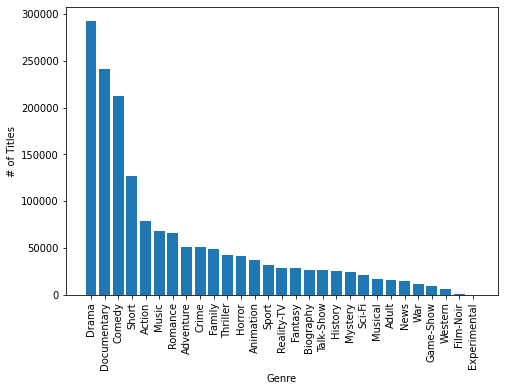

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genres = to_1D(data['genres']).value_counts().index.tolist()
count = to_1D(data['genres']).value_counts().values
ax.bar(genres,count)
plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('# of Titles')
plt.show()

In [ ]:
to_1D(data["primaryTitleTokenize"]).value_counts().iloc[20:]

el             8545
die            8357
at             8320
from           8090
life           8025
               ... 
balázs            1
galbandi          1
khunkharapi       1
menikmati         1
mansacha          1
Length: 458466, dtype: int64

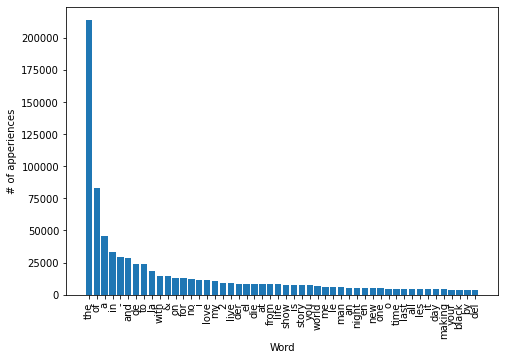

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genres = to_1D(data['primaryTitleTokenize']).value_counts().head(50).index.tolist()
count = to_1D(data['primaryTitleTokenize']).value_counts().head(50).values
ax.bar(genres,count)
plt.xticks(rotation='vertical')
plt.xlabel('Word')
plt.ylabel('# of apperiences')
plt.show()

Block removes genres that just generate noise

In [ ]:
genres_to_remove = ['Experimental', 'Film-Noir', 'News', 'Music', 'Musical', 'War']
data = data[~data.genres.isin(genres_to_remove)]